In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [2]:
import pandas as pd

df = pd.read_csv("heart.csv")  # If it says heart(1).csv, change the name here
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()
print("\nMissing values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dty

In [4]:
df.dtypes


,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [5]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267966,0.682656,-0.935208,-0.376556,-0.667728,-0.418446,0.901657,0.806035,-0.698344,-0.037124,0.979514,1.274980,1.119967
1,-0.157260,0.682656,-0.935208,0.478910,-0.841918,2.389793,-1.002541,0.237495,1.431958,1.773958,-2.271182,-0.714911,1.119967
2,1.724733,0.682656,-0.935208,0.764066,-1.403197,-0.418446,0.901657,-1.074521,1.431958,1.342748,-2.271182,-0.714911,1.119967
3,0.728383,0.682656,-0.935208,0.935159,-0.841918,-0.418446,0.901657,0.499898,-0.698344,-0.899544,0.979514,0.280034,1.119967
4,0.839089,-1.464866,-0.935208,0.364848,0.919336,2.389793,0.901657,-1.905464,-0.698344,0.739054,-0.645834,2.269926,-0.513994


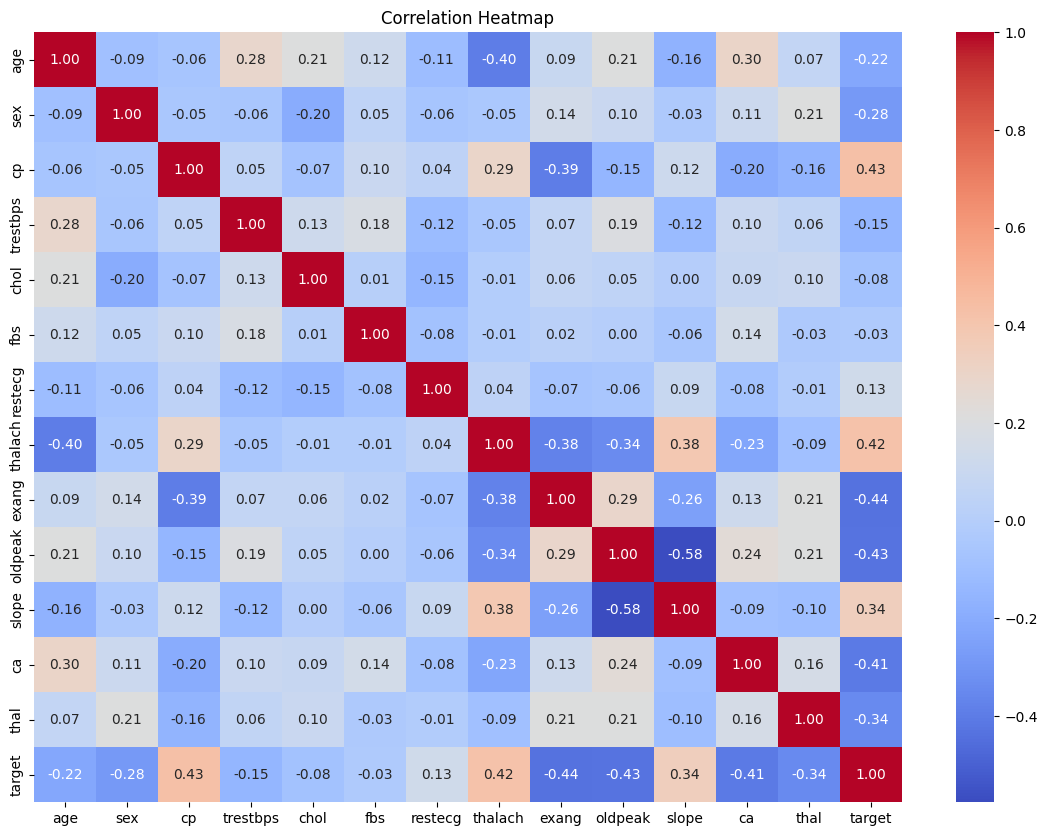

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


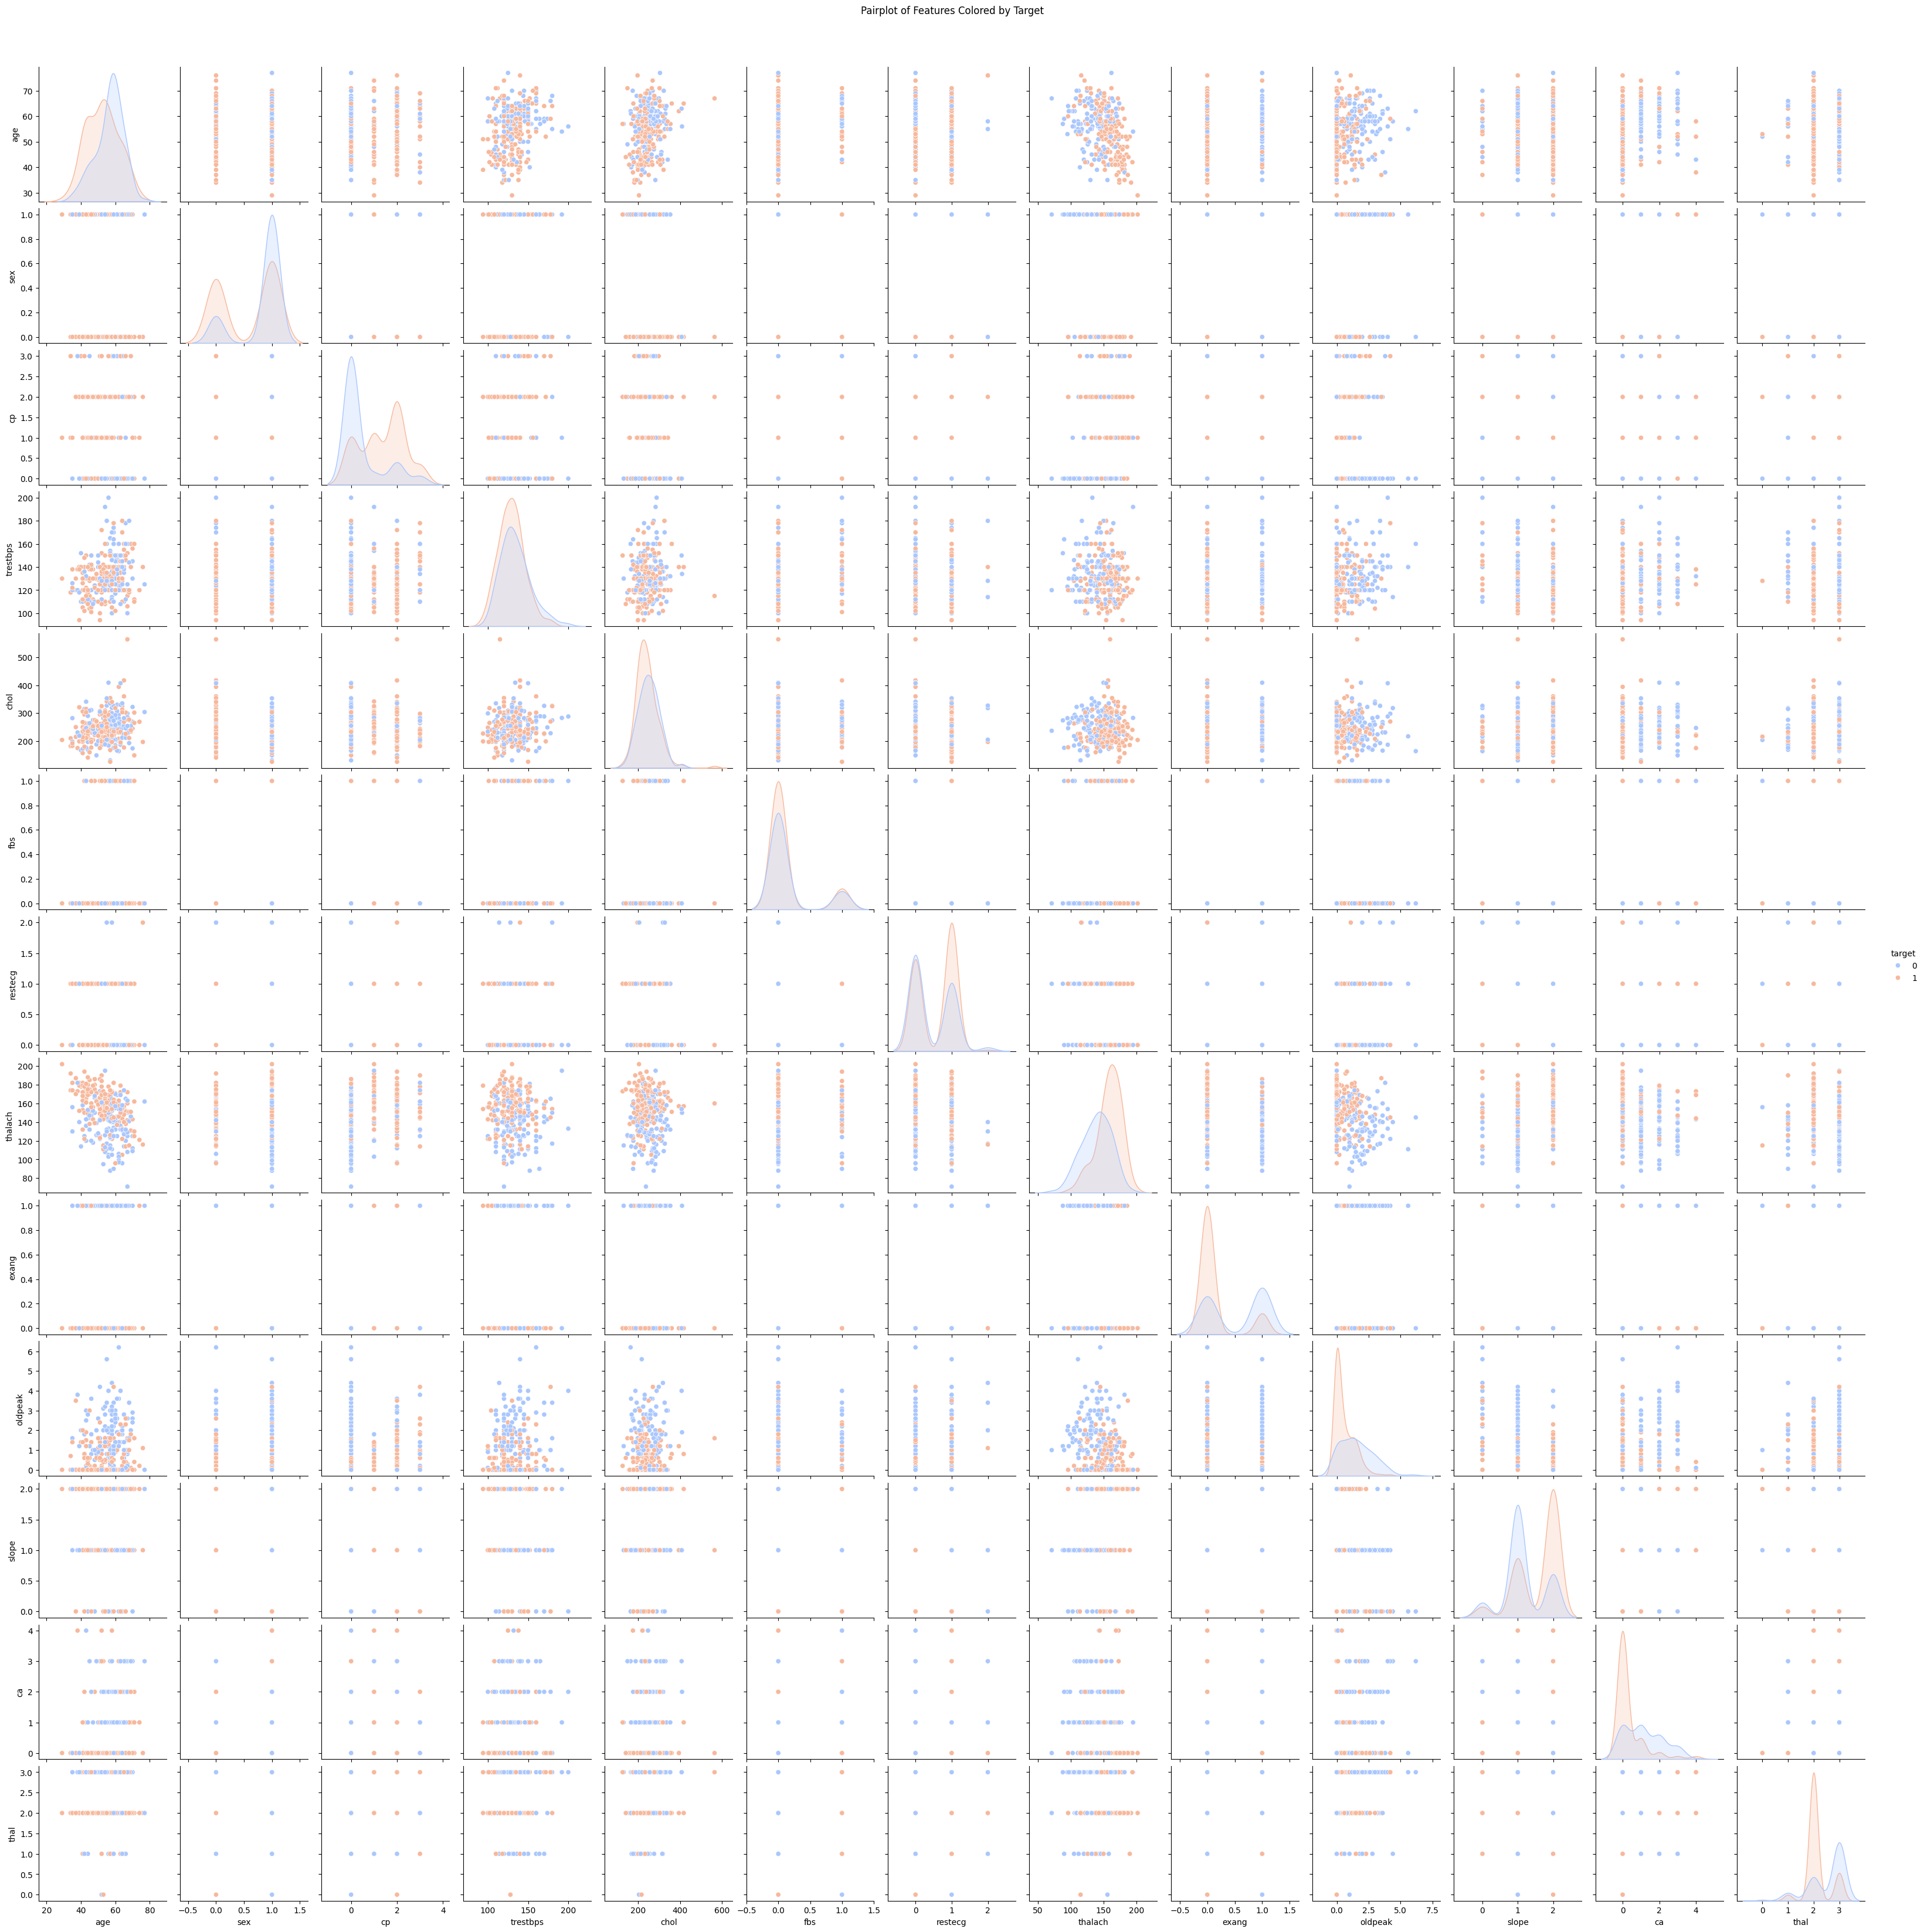

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="target", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of Features Colored by Target", y=1.02)
plt.show()


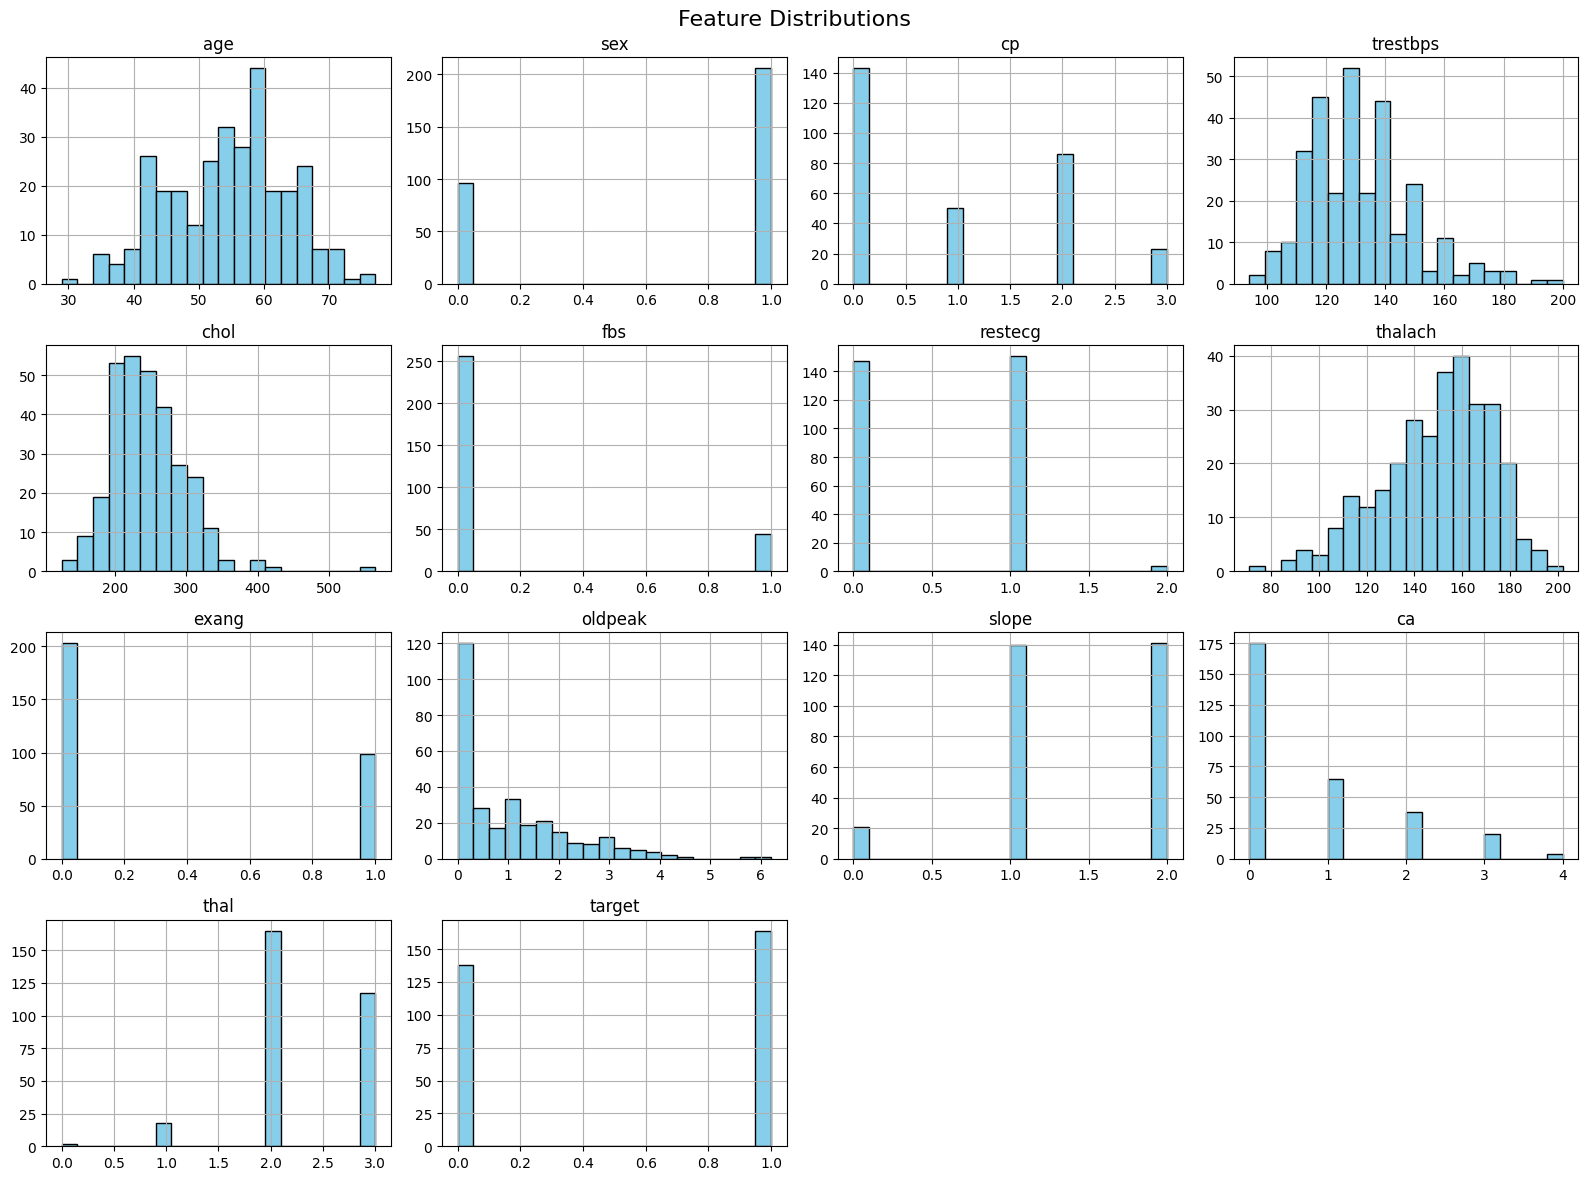

In [8]:
import matplotlib.pyplot as plt

df.hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-1159843552.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='coolwarm')
/tmp/ipython-input-9-1159843552.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, palette='coolwarm')
/tmp/ipython-input-9-1159843552.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, palette='coolwarm')


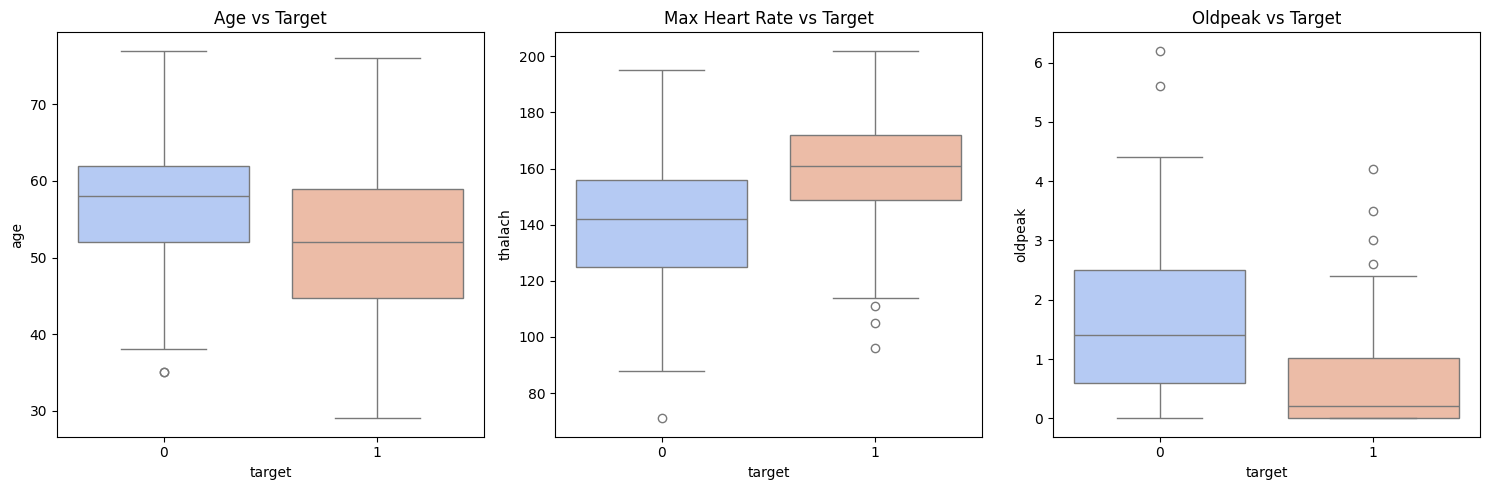

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Age vs Target
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='age', data=df, palette='coolwarm')
plt.title("Age vs Target")

# Thalach vs Target
plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='thalach', data=df, palette='coolwarm')
plt.title("Max Heart Rate vs Target")

# Oldpeak vs Target
plt.subplot(1, 3, 3)
sns.boxplot(x='target', y='oldpeak', data=df, palette='coolwarm')
plt.title("Oldpeak vs Target")

plt.tight_layout()
plt.show()


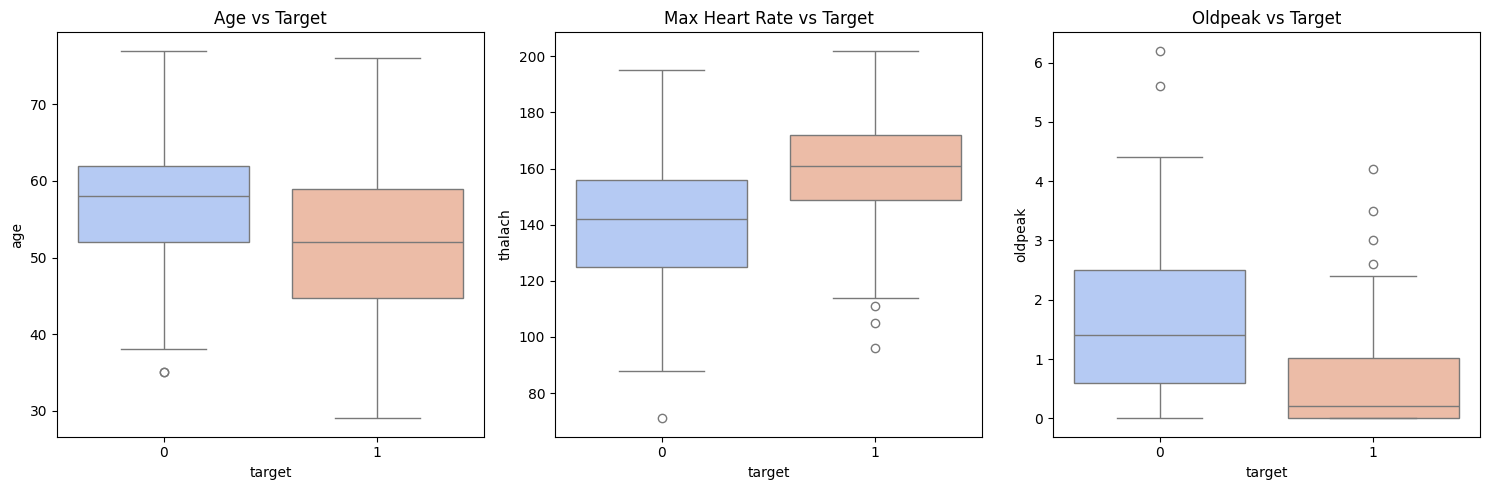

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Age vs Target
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='age', hue='target', data=df, palette='coolwarm', legend=False)
plt.title("Age vs Target")

# Thalach vs Target
plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='thalach', hue='target', data=df, palette='coolwarm', legend=False)
plt.title("Max Heart Rate vs Target")

# Oldpeak vs Target
plt.subplot(1, 3, 3)
sns.boxplot(x='target', y='oldpeak', hue='target', data=df, palette='coolwarm', legend=False)
plt.title("Oldpeak vs Target")

plt.tight_layout()
plt.show()


/tmp/ipython-input-11-1521059273.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


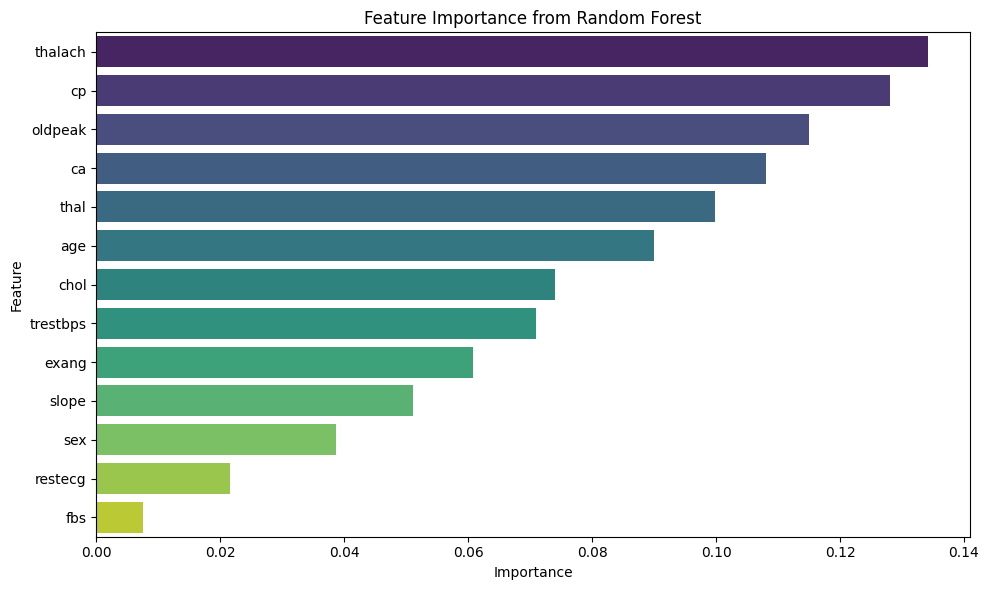

In [11]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (241, 13)
Testing Set: (61, 13)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create model objects
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)

# Train both models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("✅ Logistic Regression and Random Forest models trained successfully!")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression and Random Forest models trained successfully!


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"🔍 {name} Evaluation")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("------------------------------------------------------\n")

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)


🔍 Logistic Regression Evaluation
Accuracy : 0.7868852459016393
Precision: 0.7222222222222222
Recall   : 0.896551724137931
F1 Score : 0.8
Confusion Matrix:
 [[22 10]
 [ 3 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

------------------------------------------------------

🔍 Random Forest Evaluation
Accuracy : 0.8360655737704918
Precision: 0.7878787878787878
Recall   : 0.896551724137931
F1 Score : 0.8387096774193549
Confusion Matrix:
 [[25  7]
 [ 3 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84 

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validation Score:", grid_search.best_score_)


✅ Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
✅ Best Cross-Validation Score: 0.8176020408163266


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Best tuned model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
print("🔍 Tuned Random Forest Evaluation on Test Set")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


🔍 Tuned Random Forest Evaluation on Test Set

Confusion Matrix:
 [[23  9]
 [ 2 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [17]:
import pickle

# Save best model to file
with open("model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


In [20]:
!pip install streamlit colabcode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard'
                   ~~~~~~~^
Please use pip<24.1 if you need to use this version.
INFO: pip is looking at multiple versions of colabcode to determine which version is compatible with other requirements. This could take a while.
  Using cached uvicorn-0.13.1-py3-none-any.whl.metadata (4.6 kB)
Requested uvicorn==0.13.1 from https://files.pythonhosted.org/packages/ef/67/546c35e9fffb585ea0608ba3bdcafe17ae402e304367203d0b08d6c23051/uvicorn-0.13.1-py3-none-any.whl (from colabcode) has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    python-dotenv (>=0.13.*) ; extra == 'standard

In [2]:
!ngrok config add-authtoken 300MjTkBBQzOalk8LUcWq5MB9Og_2w4zBkHu8qtVvN17bZiRr

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [3]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load the trained model
model = pickle.load(open('model.pkl', 'rb'))

st.set_page_config(page_title="Heart Disease Prediction", page_icon="💓")
st.title("💓 Heart Disease Prediction App")
st.markdown("Check if you're at risk of heart disease by entering details below:")

# Input fields
age = st.number_input("Age", 20, 100, step=1)
sex = st.selectbox("Sex", ["Male", "Female"])
cp = st.selectbox("Chest Pain Type (cp)", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure (trestbps)", 80, 200)
chol = st.number_input("Cholesterol (chol)", 100, 400)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl (fbs)", [0, 1])
restecg = st.selectbox("Resting ECG (restecg)", [0, 1, 2])
thalach = st.number_input("Max Heart Rate Achieved (thalach)", 60, 220)
exang = st.selectbox("Exercise Induced Angina (exang)", [0, 1])
oldpeak = st.number_input("ST depression (oldpeak)", 0.0, 6.0, step=0.1)
slope = st.selectbox("Slope of ST segment (slope)", [0, 1, 2])
ca = st.selectbox("Number of Major Vessels Colored (ca)", [0, 1, 2, 3])
thal = st.selectbox("Thalassemia (thal)", [0, 1, 2, 3])

# Convert gender to numeric
sex = 1 if sex == "Male" else 0

# Predict button
if st.button("🔍 Predict Heart Disease"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, exang, oldpeak, slope, ca, thal]])

    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.error("⚠️ High Risk of Heart Disease!")
    else:
        st.success("✅ Low Risk — No Heart Disease Detected.")


Overwriting app.py


In [4]:
!nohup streamlit run app.py --server.port 8501 > output.log 2>&1 &

In [ ]:
!ngrok http 8501


In [7]:
!nohup streamlit run app.py --server.port 8501 > output.log 2>&1 &


In [8]:
import subprocess
import time
from pyngrok import ngrok

# Kill old ngrok if needed
subprocess.run(["pkill", "-f", "ngrok"])

# Start ngrok tunnel
public_url = ngrok.connect(8501)
print("🔗 Public URL:", public_url)


🔗 Public URL: NgrokTunnel: "https://704c6adf55a3.ngrok-free.app" -> "http://localhost:8501"


In [10]:
from google.colab import files

files.download("model.pkl")
files.download("heart.csv")
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# For CSV
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# For Python file
!cat app.py


import streamlit as st
import pickle
import numpy as np

# Load the trained model
model = pickle.load(open('model.pkl', 'rb'))

st.set_page_config(page_title="Heart Disease Prediction", page_icon="💓")
st.title("💓 Heart Disease Prediction App")
st.markdown("Check if you're at risk of heart disease by entering details below:")

# Input fields
age = st.number_input("Age", 20, 100, step=1)
sex = st.selectbox("Sex", ["Male", "Female"])
cp = st.selectbox("Chest Pain Type (cp)", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure (trestbps)", 80, 200)
chol = st.number_input("Cholesterol (chol)", 100, 400)
fbs = st.selectbox("Fasting Blood Sugar > 120 mg/dl (fbs)", [0, 1])
restecg = st.selectbox("Resting ECG (restecg)", [0, 1, 2])
thalach = st.number_input("Max Heart Rate Achieved (thalach)", 60, 220)
exang = st.selectbox("Exercise Induced Angina (exang)", [0, 1])
oldpeak = st.number_input("ST depression (oldpeak)", 0.0, 6.0, step=0.1)
slope = st.selectbox("Slope of ST segment (sl

In [13]:
import pickle

with open("model.pkl", "rb") as f:
    model = pickle.load(f)

# Check the model type
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [14]:
# Show model details
print(model)

# Or use it to predict from test data (if available)
# Example:
# prediction = model.predict([[your_feature_values]])


RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)
